In [75]:
!pip install JPype1

In [76]:
from os.path import join
from jpype import JClass, JString, getDefaultJVMPath, shutdownJVM, startJVM

In [77]:
ZEMBEREK_PATH: str = join('bin', 'zemberek-full.jar') # Zemberek jar dosyasının nerede olduğu

In [78]:
startJVM(
        getDefaultJVMPath(),
        '-ea',
        f'-Djava.class.path={ZEMBEREK_PATH}',
        convertStrings=False
    ) # arkaplanda çalışacak java'yı açıyorsun burada

OSError: JVM is already started

In [ ]:
TurkishMorphology: JClass = JClass('zemberek.morphology.TurkishMorphology') # burada java'da import etmişsin gibi düşün
WordAnalysis: JClass = JClass('zemberek.morphology.analysis.WordAnalysis') # aynı şekilde

morphology: TurkishMorphology = TurkishMorphology.createWithDefaults() # burada da o import'u kullanıyorsun

In [ ]:
results: WordAnalysis = morphology.analyze(JString("hazine"))

In [ ]:
str(result.getLemmas())

In [ ]:
for result in results:
        print(
            f'{str(result.formatLong())}'
            f'\n\tStems ='
            f' {", ".join([str(result) for result in result.getStems()])}'
            f'\n\tLemmas ='
            f' {", ".join([str(result) for result in result.getLemmas()])}'
        )

In [ ]:
def get_stem(results):
    return str(results).split(', ')[2].split(" ")[0].split(':')[0].split('[')[-1]

# YÜKLEME

In [79]:
import pandas as pd
import numpy as np

In [80]:
df_rate = pd.read_csv("akbank_rates.csv")

In [81]:
df = pd.read_csv("Akbank_haber.csv")

In [82]:
df.date=df.date.str.replace("Mart","03")

In [83]:
df.date=df.date.str.replace("Nisan","04")

In [84]:
df.date=df.date.str.replace("Mayıs","05")

In [85]:
df.date=df.date.str.replace("Haziran","06")

In [86]:
df.date=df.date.str.replace("Temmuz","07")

In [87]:
df.date=df.date.str.replace("Ağustos","08")

In [88]:
df.date=df.date.str.replace("Eylül","09")

In [89]:
df.date=df.date.str.replace("Ekim","10")

In [90]:
df.date=df.date.str.replace("Kasım","11")

In [91]:
df.date=df.date.str.replace("Aralık","12")

In [92]:
df.date=df.date.str.replace("Ocak","01")

In [93]:
df.date=df.date.str.replace("Şubat","02")

### REPLACE

In [94]:
df.date=df.date.str.replace(" ",".")

# DATEM

In [95]:
from datetime import datetime

In [96]:
datem=[]

In [97]:

for d in df_rate.Tarih:
    datem.append(datetime.strptime(d, '%d.%m.%Y'))
    

In [98]:
df_rate["datem"] = datem

In [99]:
dff=df_rate.drop("Tarih",axis=1)

# LABELLAMA

In [100]:
dff.sort_values(by=['datem'], inplace=True, ascending=True,ignore_index=True)

In [101]:
dff["Fark %"]=dff["Fark %"].str.replace("%","")
dff["Fark %"]=dff["Fark %"].str.replace(",",".")

In [102]:
dff['Fark %'] = dff['Fark %'].astype(float)

In [151]:
def classify(fark):
    if fark > 1:
        return 1
    elif fark < -1:  
        return -1
    elif -1< fark < 1:
        return 0

In [152]:
dff["label"] = dff.apply(lambda x:classify(x["Fark %"]),axis=1)

In [153]:
#dff.to_csv(r'kaydet.csv', index = False)

# DF

In [154]:
dates=[]
from datetime import datetime
for d in df.date:
    dates.append(datetime.strptime(d, '%d.%m.%Y'))
    

AttributeError: 'DataFrame' object has no attribute 'date'

In [155]:
df["dates"]= dates

ValueError: Length of values does not match length of index

In [156]:
df.drop(["date"],axis=1,inplace=True)

KeyError: "['date'] not found in axis"

In [157]:
df.head()

,content,label
0,bıst bini aşağı geç hedge şart ancak bin sağla...,1
2,üretim kusur ol olmadık incel başla dünya hava...,-1
3,başta ol üzere gü önem şirket haber ziraat yat...,1
4,başta ol üzere gü önem şirket haber ziraat yat...,1
5,hazin ve maliye bakanlığ milyon tl sermaye ipo...,-1


In [158]:
dff.head()

,Şimdi,Açılış,Yüksek,Düşük,Hac.,Fark %,datem,label
0,"7,73","7,65","7,76","7,57","23,93M",1.71,2015-05-27,1.0
1,"7,7","7,75","7,81","7,7","20,81M",-0.39,2015-05-28,0.0
2,"7,58","7,74","7,85","7,53","29,34M",-1.56,2015-05-29,-1.0
3,"7,29","7,52","7,59","7,28","20,16M",-3.83,2015-06-01,-1.0
4,"7,48","7,3","7,48","7,28","21,72M",2.61,2015-06-02,1.0


## MERGE

In [159]:
df_merge = df.merge(dff, left_on = "dates", right_on = "datem")

KeyError: 'dates'

In [160]:
df_merge.head()

,title,content,time,dates,Şimdi,Açılış,Yüksek,Düşük,Hac.,Fark %,datem,label
0,Endekste 101.000 sağlam destek,bıst bini aşağı geç hedge şart ancak bin sağla...,09:27,2019-03-15,"6,69","6,6","6,72","6,59","49,80M",1.83,2019-03-15,1.0
2,Bankalar uçarken havayolları iniyor,üretim kusur ol olmadık incel başla dünya hava...,10:00,2019-03-14,"6,57","6,61","6,7","6,53","51,91M",-0.61,2019-03-14,-1.0
3,Şirket haberleri ve tavsiyeleri 13/3/2019,başta ol üzere gü önem şirket haber ziraat yat...,08:59,2019-03-13,"6,61","6,45","6,66","6,44","75,73M",2.32,2019-03-13,1.0
4,Şirket haberleri ve tavsiyeleri 12/3/2019,başta ol üzere gü önem şirket haber ziraat yat...,09:10,2019-03-12,"6,46","6,35","6,5","6,32","49,25M",2.54,2019-03-12,1.0
5,Hazine'nin yeni projesine 12 banka ortak oluyor,hazin ve maliye bakanlığ milyon tl sermaye ipo...,12:31,2019-03-08,"6,37","6,53","6,57","6,31","43,55M",-2.15,2019-03-08,-1.0


In [161]:
df_merge.label.value_counts()

-1.0    743
 1.0    697
 0.0    417
Name: label, dtype: int64

# TextBlob

In [162]:
import textblob

In [163]:
from textblob import TextBlob

In [164]:
df["title"].apply(lambda x: TextBlob(x).words)

KeyError: 'title'

# ZEMBEREK

In [165]:
from os.path import join
import jpype
from jpype import JClass, JString, getDefaultJVMPath, shutdownJVM, startJVM, isJVMStarted
import pandas as pd
import numpy as np
import re

In [166]:
from os.path import join
import jpype
from jpype import JClass, JString, getDefaultJVMPath, shutdownJVM, startJVM, isJVMStarted
import pandas as pd
import numpy as np
import re

class Text_Cleaner:
    
    def __init__(self,):
        self.zemberek() 
              
    def text_cleaner(self,ds): #data_Seri - data.content
        # kullanmadan önce dropna yap
        array = []
        ds = ds.apply(lambda x: self.norm_doc(str(x)))
        ds = ds.str.replace("I","ı").str.replace("İ","i").str.lower().str.replace("[^\w\s]"," ")
        
        for i in ds: #kelime --> zemberek
            a =  ""
            for t in i.split():
                try:  
                    results: WordAnalysis = self.morphology.analyze(JString(t))
                        
                    if "Neg" in str(list(results)[0].formatLong()):
                        wrd = str(list(results)[0].getLemmas()[1])
                    else:
                        wrd = str(list(results)[0].getStems()[0])
                    a +=  wrd + " " 

                except:
                    continue
            a = re.sub(r'\b\w\b', "", a) # tekharfler silindi
            array.append(a)
            
        return array
        
        
    def norm_doc(self,sentence): 
        sentence = re.sub("'[A-Za-z]+", "", sentence) #tırnak eki silindi
        
        return re.sub("\d+", "", sentence) #sayılar silindi
    
    
    def zemberek(self,):
        ZEMBEREK_PATH: str = join('bin', 'zemberek-full.jar')
        if not jpype.isJVMStarted():   
            startJVM( getDefaultJVMPath(),'-ea',f'-Djava.class.path={ZEMBEREK_PATH}',convertStrings=False)
        TurkishMorphology: JClass = JClass('zemberek.morphology.TurkishMorphology') # burada java'da import etmişsin gibi düşün
        WordAnalysis: JClass = JClass('zemberek.morphology.analysis.WordAnalysis') # aynı şekilde
        self.morphology: TurkishMorphology = TurkishMorphology.createWithDefaults() # burada da o import'u kullanıyorsun
            
    def zemberek_shutdown(self,):
        shutdownJVM()
    

In [167]:
tc = Text_Cleaner()

In [168]:
df_merge = df_merge[df_merge['content'].notna()]

In [169]:
df_merge.content = tc.text_cleaner(df_merge.content)

In [170]:
df_merge.content.head(10).tolist()

['bıst bini aşağı geç hedge şart ancak bin sağlam destek yine de bin geç iyimser zor ',
 'üretim kusur ol olmadık incel başla dünya havayolu firma da bu model uçak uç durdur bıst ise bank hiss önder pozitif sürdür ',
 'başta ol üzere gü önem şirket haber ziraat yatır analiz et ',
 'başta ol üzere gü önem şirket haber ziraat yatır analiz et ',
 'hazin ve maliye milyon tl sermaye ipotek finansman kur kur ',
 'saba üniversite center of excellence in finance finansal teknoloji al ön gelen bir is ol chris skinner istanbul da konuk ',
 'hazin ve maliye milyon tl sermaye ipotek finansman kur kur ',
 'saba üniversite center of excellence in finance finansal teknoloji al ön gelen bir is ol chris skinner istanbul da konuk ',
 'hazin ve maliye milyon tl sermaye ipotek finansman kur kur ',
 'bugün gerçek tcmb par politika kurul toplantı çık faiz sabit kar sonra analist yorumla gel ']

In [171]:
df=df_merge[["content","label"]]

In [172]:
df

,content,label
0,bıst bini aşağı geç hedge şart ancak bin sağla...,1.0
2,üretim kusur ol olmadık incel başla dünya hava...,-1.0
3,başta ol üzere gü önem şirket haber ziraat yat...,1.0
4,başta ol üzere gü önem şirket haber ziraat yat...,1.0
5,hazin ve maliye milyon tl sermaye ipotek finan...,-1.0
...,...,...
1872,spk akbank ın portföy hizmet ver üzere yetkile...,1.0
1873,kamu bank borsa özel bank göre negatif ayrış u...,-1.0
1874,hergün neredeyse yeni müşteri tanış akbank dir...,1.0
1875,türki ye ol yabancı ilgi kadar türki de çıkma ...,1.0


In [173]:
#df.to_csv(r'kaydet1.csv', index = False)

In [174]:
import pandas as pd 
import numpy as np
import sys
import grpc
#import zemberek_grpc.morphology_pb2 as z_morphology
#import zemberek_grpc.morphology_pb2_grpc as z_morphology_g
import matplotlib.pyplot as plt
import re
from sklearn.metrics import classification_report
import string
from nltk.corpus import stopwords
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB,BernoulliNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC
from sklearn.linear_model import SGDClassifier
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer,TfidfTransformer
from sklearn.cluster import KMeans

In [175]:
def analyze(i):
    response = morphology_stub.AnalyzeSentence(z_morphology.SentenceAnalysisRequest(input=i))
    return response

In [176]:
def fix_decode(text):
    """Pass decode."""
    if sys.version_info < (3, 0):
        return text.decode('cp1254')
    else:
        return text

In [177]:
notr=df[df.label==0]
pos=df[df.label==1]
neg=df[df.label==-1]
print(f" Pozitif Label Len :{len(pos)} \n Negatif Label Len :{len(neg)} \n Notr Label Len    :{len(notr)}")

 Pozitif Label Len :697 
 Negatif Label Len :743 
 Notr Label Len    :417


In [178]:
def zemberek(text):
    clean=[]
    analysis_input = text
    print('Analysis result for input : ' + fix_decode(analysis_input))
    analysis_result = analyze(analysis_input)
    for a in analysis_result.results:
        best = a.best
        lemmas = best.lemmas[0]
        if lemmas!="UNK":
#             print("Lemmas = " + lemmas)
            clean.append(lemmas)
        elif lemmas == "UNK":
            clean.append(a.token)
    clean = " ".join(clean)
    return clean

In [180]:
df.label.fillna("0",inplace=True)

C:\Users\enes_\anaconda3\lib\site-packages\pandas\core\generic.py:6245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [181]:
df_x=df.content.astype(str)
df_y=df.label.astype("int")


x_train, x_test, y_train, y_test = train_test_split(df_x, df_y, test_size=0.2,random_state=44)

In [182]:

pipeline = Pipeline([
    ('vect', CountVectorizer(analyzer ='word',ngram_range=(1,6),)),
    ('tfidf', TfidfTransformer()),
])

In [183]:

x_train_vect=pipeline.fit_transform(x_train)
x_test_vect=pipeline.transform(x_test)

In [184]:

mnb = MultinomialNB(alpha=0.01) # Çok sınıflı problemlerde kullanılır.
knn = KNeighborsClassifier(3)
svc = LinearSVC(random_state=44)
rfc = RandomForestClassifier(n_estimators=20,criterion='gini',)#
tree = DecisionTreeClassifier()
sgd = SGDClassifier(alpha=0.01,random_state=44)
kmeans = KMeans(n_clusters=3, random_state=0)

In [185]:
# models=[mnb]
models=[mnb,svc,rfc,tree,sgd,knn]
best_acc=0
selected=models[0]
for count,model in enumerate(models):
    try:
        model=model.fit(x_train_vect,y_train)
        accuracy=accuracy_score(y_test,model.predict(x_test_vect))
        print(f"Model : {models[count]} \n Accuracy : {accuracy} \n")
        if accuracy>best_acc:
            best_acc=accuracy
            selected=model
    except Exception:
        continue
print("Best Accuracy :" + str(best_acc))
print("Selected Model : " + str(selected))

Model : MultinomialNB(alpha=0.01) 
 Accuracy : 0.5026881720430108 

Model : LinearSVC(random_state=44) 
 Accuracy : 0.5 

Model : RandomForestClassifier(n_estimators=20) 
 Accuracy : 0.5053763440860215 

Model : DecisionTreeClassifier() 
 Accuracy : 0.48118279569892475 

Model : SGDClassifier(alpha=0.01, random_state=44) 
 Accuracy : 0.5188172043010753 

Model : KNeighborsClassifier(n_neighbors=3) 
 Accuracy : 0.4381720430107527 

Best Accuracy :0.5188172043010753
Selected Model : SGDClassifier(alpha=0.01, random_state=44)


In [186]:
def make_predict(text):
    text=zemberek(text)
    text=clean_text(text)
    text = pipeline.transform([text])
    pred = selected.predict(text)
    print(text)
    print(pred)

In [187]:
y_predict=selected.predict(x_test_vect)
y_actual=np.array(y_test)

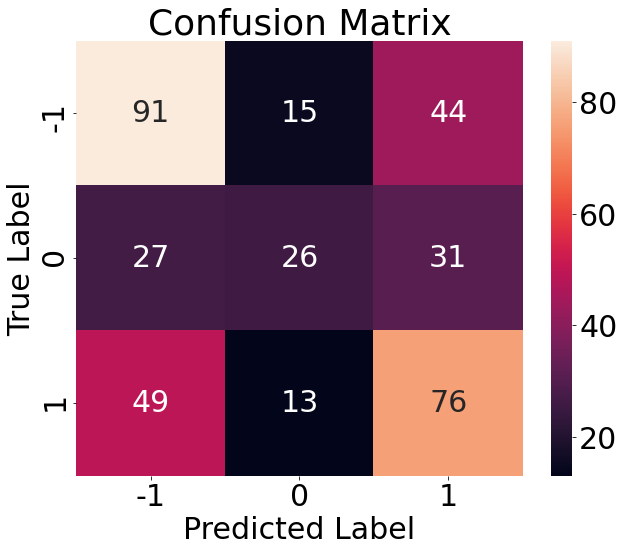

In [188]:
plt.figure(figsize=(10,8))
cm = confusion_matrix(y_actual, y_predict)
class_label = ["-1", "0","1"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.rcParams.update({'font.size': 30})
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [189]:

print(classification_report(y_actual, y_predict, labels=[-1,0,1]))

              precision    recall  f1-score   support

          -1       0.54      0.61      0.57       150
           0       0.48      0.31      0.38        84
           1       0.50      0.55      0.53       138

    accuracy                           0.52       372
   macro avg       0.51      0.49      0.49       372
weighted avg       0.52      0.52      0.51       372



In [192]:
df['content'].values.tolist()

['bıst bini aşağı geç hedge şart ancak bin sağlam destek yine de bin geç iyimser zor ',
 'üretim kusur ol olmadık incel başla dünya havayolu firma da bu model uçak uç durdur bıst ise bank hiss önder pozitif sürdür ',
 'başta ol üzere gü önem şirket haber ziraat yatır analiz et ',
 'başta ol üzere gü önem şirket haber ziraat yatır analiz et ',
 'hazin ve maliye milyon tl sermaye ipotek finansman kur kur ',
 'saba üniversite center of excellence in finance finansal teknoloji al ön gelen bir is ol chris skinner istanbul da konuk ',
 'hazin ve maliye milyon tl sermaye ipotek finansman kur kur ',
 'saba üniversite center of excellence in finance finansal teknoloji al ön gelen bir is ol chris skinner istanbul da konuk ',
 'hazin ve maliye milyon tl sermaye ipotek finansman kur kur ',
 'bugün gerçek tcmb par politika kurul toplantı çık faiz sabit kar sonra analist yorumla gel ',
 'bugün gerçek tcmb par politika kurul toplantı çık faiz sabit kar sonra analist yorumla gel ',
 'bugün gerçek tcmb

In [193]:
df['content']

0       bıst bini aşağı geç hedge şart ancak bin sağla...
2       üretim kusur ol olmadık incel başla dünya hava...
3       başta ol üzere gü önem şirket haber ziraat yat...
4       başta ol üzere gü önem şirket haber ziraat yat...
5       hazin ve maliye milyon tl sermaye ipotek finan...
                              ...                        
1872    spk akbank ın portföy hizmet ver üzere yetkile...
1873    kamu bank borsa özel bank göre negatif ayrış u...
1874    hergün neredeyse yeni müşteri tanış akbank dir...
1875    türki ye ol yabancı ilgi kadar türki de çıkma ...
1876    barclays göre türk bank al yap için bekle gere...
Name: content, Length: 1860, dtype: object

# RNN

In [ ]:
target = df["label"].values.tolist()
data = df["content"].values.tolist()

In [ ]:
cutoff = int(len(data) * 0.90)
x_train, x_test = data[:cutoff], data[cutoff:]
y_train, y_test = target[:cutoff], target[cutoff:]

In [ ]:
x_train[500]

In [ ]:
y_train[500]

# tokenleştirme

In [ ]:
num_words = 10000 # kelime haznesi

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
tokenizer = CountVectorizer()

In [ ]:
X = tokenizer.fit_transform(data)

In [ ]:
print(tokenizer.get_feature_names())

In [ ]:
print(X.toarray())